In [1]:
import pandas as pd                # Import pandas library for data manipulation and analysis, aliased as pd
import numpy as np                 # Import numpy library for numerical operations, especially arrays, aliased as np
import matplotlib.pyplot as plt   # Import pyplot module from matplotlib for plotting graphs, aliased as plt
import seaborn as sns             # Import seaborn library for advanced statistical data visualization, aliased as sns

from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler      # Import scaler for feature standardization (mean=0, std=1)
from sklearn.metrics import (                           # Import evaluation metrics for model performance
    accuracy_score, f1_score, roc_auc_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression    # Import logistic regression model
from sklearn.neighbors import KNeighborsClassifier      # Import K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier         # Import decision tree classifier
from sklearn.neural_network import MLPClassifier        # Import Multi-Layer Perceptron (neural network) classifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict  # Import stratified k-fold cross-validation and cross-validation prediction functions
from xgboost import XGBClassifier                        # Import XGBoost classifier for gradient boosting
from catboost import CatBoostClassifier                  # Import CatBoost classifier (gradient boosting with categorical support)
from imblearn.over_sampling import SMOTE                 # Import SMOTE algorithm for synthetic minority oversampling (handle class imbalance)
from sklearn.svm import SVC                               # Import Support Vector Classifier (SVM)
from sklearn.naive_bayes import GaussianNB                # Import Gaussian Naive Bayes classifier
from sklearn.ensemble import BaggingClassifier            # Import Bagging ensemble classifier
from sklearn.ensemble import RandomForestClassifier       # Import Random Forest ensemble classifier
from collections import defaultdict                        # Import defaultdict container (dict subclass with default values)

pd.set_option('display.max_columns', 40)  # Set pandas option to display up to 40 columns when printing DataFrames


In [2]:
df = pd.read_csv('dataWeather.csv')  # Read a CSV file named 'dataWeather.csv' into a pandas DataFrame called df
df.head()                            # Display the first 5 rows of the DataFrame to get a quick look at the data


,checkin_business_id,checkin_date,business_name,business_address,business_city,business_state,postal_code,business_lat,business_long,star_rating,total_reviews,categories,has_tv,caters,alcohol_flag,drive_thru,good_for_kids,take_out,delivery,accepts_credit_cards,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,parking_garage,parking_street,parking_validated,parking_lot,parking_valet,satisfaction,temp_max,temp_min,precip_mm,wind_max
0,0169EQn9SEi1bocoX5Ps1w,2019-04-19,Rainbow Grocery,4837 Magazine St,New Orleans,LA,70115,29.920566,-90.107119,4.5,21,"Food, Breakfast & Brunch, Grocery, Beer, Wine ...",True,False,1,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,79.0,59.6,5.55,10.1
1,033Ok264muClFlaWFeqo9g,2019-07-05,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.9,62.2,5.90,23.1
2,033Ok264muClFlaWFeqo9g,2019-07-14,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,80.2,71.6,10.68,12.6
3,033Ok264muClFlaWFeqo9g,2019-07-15,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,87.2,49.5,3.25,18.2
4,033Ok264muClFlaWFeqo9g,2019-07-17,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.1,58.1,7.37,13.5


In [3]:
df['checkin_date'] = pd.to_datetime(df['checkin_date'])  
# Convert the 'checkin_date' column to datetime objects for easier date manipulation

df['is_weekend'] = df['checkin_date'].dt.weekday >= 5  
# Create a new column 'is_weekend' that is True if the day of the week is Saturday (5) or Sunday (6), otherwise False


In [4]:
df

,checkin_business_id,checkin_date,business_name,business_address,business_city,business_state,postal_code,business_lat,business_long,star_rating,total_reviews,categories,has_tv,caters,alcohol_flag,drive_thru,good_for_kids,take_out,delivery,accepts_credit_cards,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,parking_garage,parking_street,parking_validated,parking_lot,parking_valet,satisfaction,temp_max,temp_min,precip_mm,wind_max,is_weekend
0,0169EQn9SEi1bocoX5Ps1w,2019-04-19,Rainbow Grocery,4837 Magazine St,New Orleans,LA,70115,29.920566,-90.107119,4.5,21,"Food, Breakfast & Brunch, Grocery, Beer, Wine ...",True,False,1,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,79.0,59.6,5.55,10.1,False
1,033Ok264muClFlaWFeqo9g,2019-07-05,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.9,62.2,5.90,23.1,False
2,033Ok264muClFlaWFeqo9g,2019-07-14,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,80.2,71.6,10.68,12.6,True
3,033Ok264muClFlaWFeqo9g,2019-07-15,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,87.2,49.5,3.25,18.2,False
4,033Ok264muClFlaWFeqo9g,2019-07-17,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.1,58.1,7.37,13.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68064,ZZlHHzmyohS4uHiMNtcbhQ,2020-10-16,Catty Car Corner,1340 Poydras St,New Orleans,LA,70112,29.951039,-90.077341,4.0,71,"Soul Food, Restaurants",True,True,0,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,64.8,58.8,10.97,19.2,False
68065,ZZlHHzmyohS4uHiMNtcbhQ,2020-10-26,Catty Car Corner,1340 Poydras St,New Orleans,LA,70112,29.951039,-90.077341,4.0,71,"Soul Food, Restaurants",True,True,0,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,66.0,45.0,7.81,7.3,False
68066,ZZlHHzmyohS4uHiMNtcbhQ,2020-11-14,Catty Car Corner,1340 Poydras St,New Orleans,LA,70112,29.951039,-90.077341,4.0,71,"Soul Food, Restaurants",True,True,0,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,68.6,60.9,0.00,16.5,True
68067,ZZlHHzmyohS4uHiMNtcbhQ,2020-12-06,Catty Car Corner,1340 Poydras St,New Orleans,LA,70112,29.951039,-90.077341,4.0,71,"Soul Food, Restaurants",True,True,0,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,82.4,53.4,7.78,15.4,True


In [5]:
cols_to_drop = [
    'checkin_business_id', 'checkin_date', 'business_name', 'business_address',
    'business_city', 'business_state', 'postal_code', 'categories', 'star_rating'
]  
# Define a list of column names that we want to remove from the DataFrame, as they are not needed for analysis or modeling

df = df.drop(columns=cols_to_drop)  
# Drop the specified columns from the DataFrame and assign the result back to df (removing unwanted features)


In [6]:
# Define features and target
X = df.drop(columns=["satisfaction"])  # Create feature matrix X by dropping the 'satisfaction' column from df
y = df["satisfaction"]                 # Create target vector y using the 'satisfaction' column 

In [7]:
# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                  # Split features (X) and target (y)
    test_size=0.3,         # Use 30% of the data as the test set
    stratify=y,            # Keep the same class distribution in train and test sets (important for classification)
    random_state=42        # Set random seed for reproducibility
)


In [8]:
# Scale features
scaler = StandardScaler()                  # Create a StandardScaler object to standardize features (mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it (learn parameters and apply scaling)
X_test_scaled = scaler.transform(X_test)        # Transform the test data using the same scaling parameters learned from training data


In [9]:
# Apply SMOTE to training set only
smote = SMOTE(random_state=42)  
# Create an instance of SMOTE (Synthetic Minority Over-sampling Technique) to balance classes by generating synthetic samples for the minority class

X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)  
# Fit SMOTE on the scaled training data and resample it, creating a balanced training set (X_train_bal and y_train_bal)


In [10]:
# ---Define Models ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),  
    # Logistic Regression with increased max iterations for convergence and fixed random state
    
    "KNN": KNeighborsClassifier(),  
    # K-Nearest Neighbors classifier with default parameters
    
    "DecisionTree": DecisionTreeClassifier(random_state=42),  
    # Decision Tree classifier with fixed random state for reproducibility
    
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),  
    # Random Forest ensemble with 100 trees and fixed random state
    
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),  
    # XGBoost classifier with logloss evaluation metric and fixed random state
    
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),  
    # CatBoost classifier with no verbose output and fixed random state
    
    "MLPClassifier": MLPClassifier(max_iter=500, random_state=42),  
    # Multi-Layer Perceptron neural network with max 500 iterations and fixed random state
    
    #"SVM": SVC(probability=True, random_state=42),  
    # Support Vector Machine classifier with probability estimates enabled (commented out)
    
    "NaiveBayes": GaussianNB(),  
    # Gaussian Naive Bayes classifier
    
    "Bagging": BaggingClassifier(  
        n_estimators=50,  
        random_state=42  
    )  
    # Bagging ensemble with 50 base estimators and fixed random state
}


In [11]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # 5-fold stratified cross-validation on training data to estimate model performance before final training
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Get predicted probabilities for the positive class from cross-validation on training set
    y_train_proba_cv = cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')[:, 1]
    
    # Convert probabilities to binary predictions using 0.5 threshold
    y_train_pred_cv = (y_train_proba_cv >= 0.5).astype(int)

    # Train the model on the full training data
    model.fit(X_train, y_train)

    # Predict classes on the test set
    y_pred = model.predict(X_test)
    
    # Predict probabilities for the positive class on the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate accuracy score on the test set
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1 score on the test set (harmonic mean of precision and recall)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate Gini coefficient from ROC AUC (Gini = 2 * AUC - 1)
    gini = 2 * roc_auc_score(y_test, y_proba) - 1

    # Calculate Top Decile Lift (TDL) on test set
    df_pred = pd.DataFrame({"proba": y_proba, "true": y_test.reset_index(drop=True)})
    top_10pct = int(0.1 * len(df_pred))  # Number of samples in top 10%
    
    # Average true positive rate in top 10% predicted probabilities
    top_decile_rate = df_pred.sort_values("proba", ascending=False).head(top_10pct)["true"].mean()
    
    # Overall average true positive rate
    overall_rate = df_pred["true"].mean()
    
    # Top Decile Lift = (Top 10% positive rate) / (Overall positive rate)
    tdl = top_decile_rate / overall_rate

    # Return a dictionary with model name, metrics, predictions, probabilities, and trained model object
    return {
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Gini Coefficient": gini,
        "Top Decile Lift": tdl,
        "Predictions": y_pred,
        "Probabilities": y_proba,
        "Trained Model": model
    }


In [12]:
# --- Run All Models ---
results_list = []        # List to store summary evaluation metrics for each model
trained_models = {}      # Dictionary to save the trained model objects by name
conf_matrices = {}       # Dictionary to save confusion matrices for each model

for name, model in models.items():  # Loop over each model in your defined models dictionary
    result = evaluate_model(name, model, X_train_bal, y_train_bal, X_test_scaled, y_test)  
    # Evaluate the model using your evaluate_model function with balanced training data and scaled test data
    
    # Append a summary dict of key metrics to results_list
    results_list.append({k: result[k] for k in ["Model", "Accuracy", "F1 Score", "Gini Coefficient", "Top Decile Lift"]})
    
    # Store the trained model object
    trained_models[name] = result["Trained Model"]
    
    # Calculate and store confusion matrix for test predictions
    conf_matrices[name] = confusion_matrix(y_test, result["Predictions"])
    
    # Print confirmation that the model finished training and evaluation
    print(f"Model '{name}' training finished.")


Model 'LogisticRegression' training finished.
Model 'KNN' training finished.
Model 'DecisionTree' training finished.
Model 'RandomForest' training finished.
Model 'XGBoost' training finished.
Model 'CatBoost' training finished.
Model 'MLPClassifier' training finished.
Model 'NaiveBayes' training finished.
Model 'Bagging' training finished.


In [13]:
results_df = pd.DataFrame(results_list)  
# Convert the list of dictionaries (each containing model metrics) into a pandas DataFrame for easy viewing and analysis

results_df  
# Display the DataFrame showing the performance summary of all models side-by-side


,Model,Accuracy,F1 Score,Gini Coefficient,Top Decile Lift
0,LogisticRegression,0.658881,0.733247,0.514102,1.314880
1,KNN,0.918907,0.944374,0.939760,1.316827
2,DecisionTree,0.996425,0.997630,0.991762,1.323966
3,RandomForest,0.997552,0.998377,0.999944,1.325264
4,XGBoost,0.994075,0.996063,0.999520,1.325264
5,CatBoost,0.997356,0.998246,0.999759,1.325264
6,MLPClassifier,0.983448,0.988930,0.997872,1.325264
7,NaiveBayes,0.542089,0.584345,0.443543,1.248033
8,Bagging,0.997845,0.998571,0.999961,1.325264


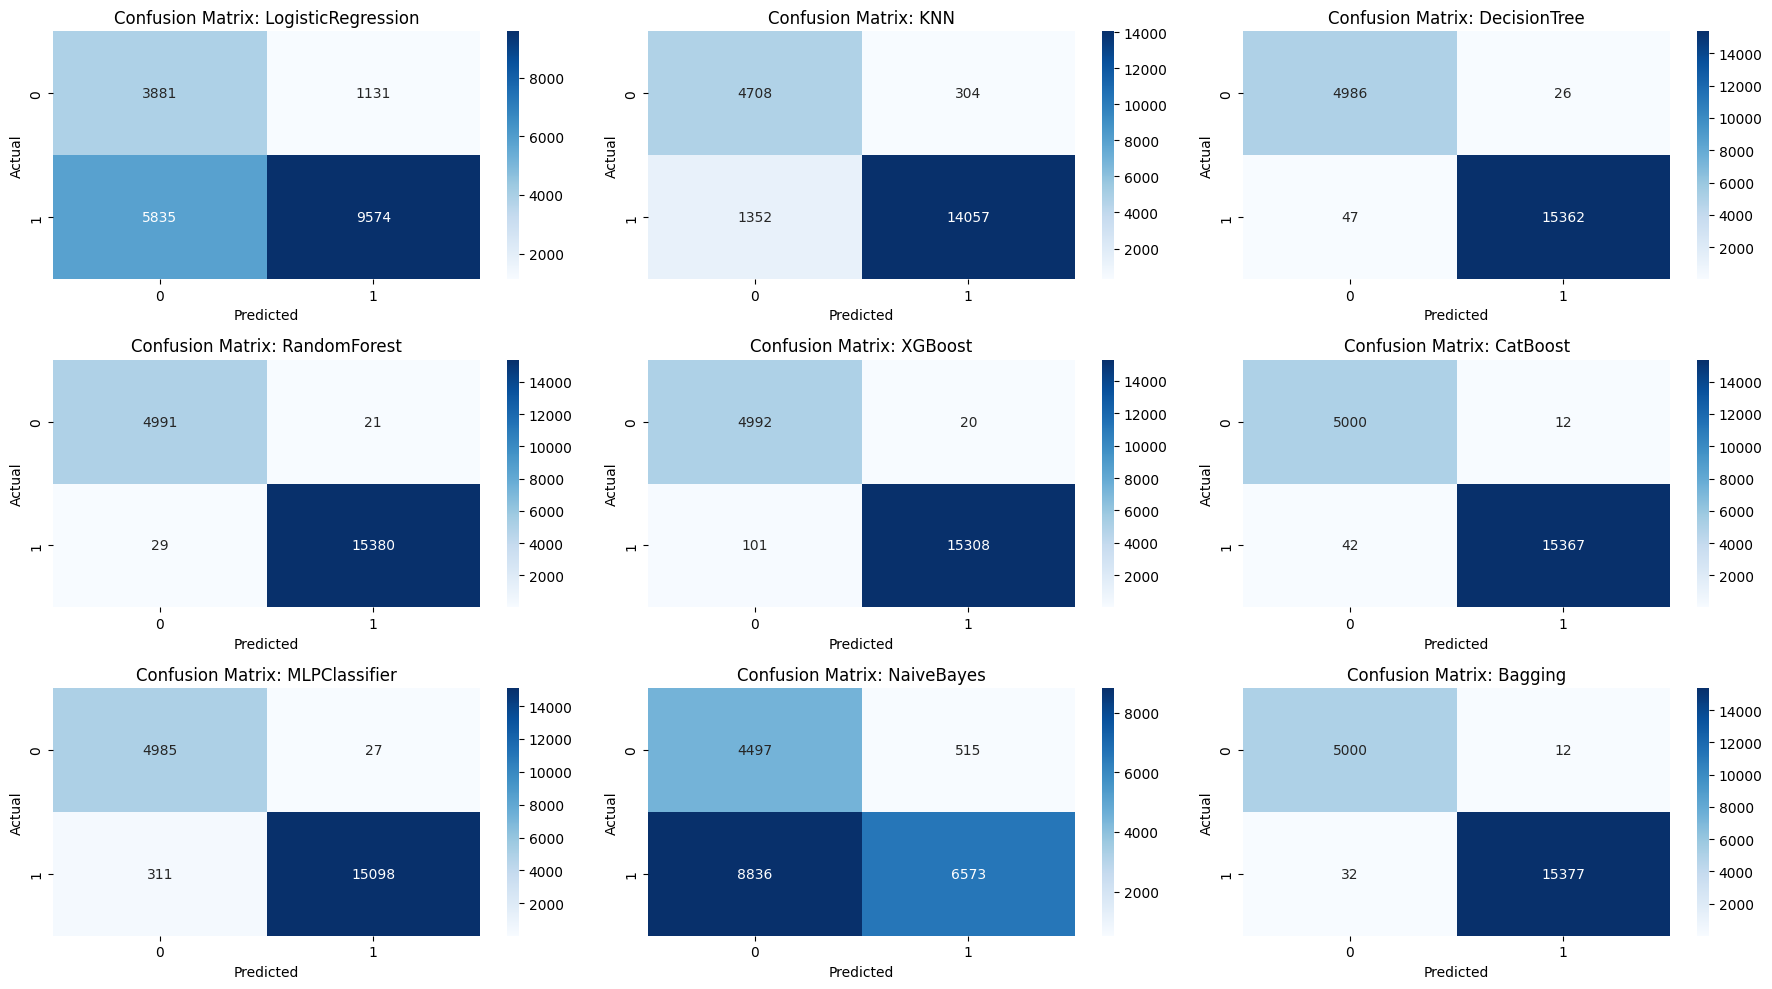

In [14]:
# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # Create a 3x3 grid of subplots (enough for up to 9 models) with specified figure size
axes = axes.flatten()                             # Flatten the 2D array of axes into a 1D array for easy iteration

for idx, (name, cm) in enumerate(conf_matrices.items()):  # Loop over model names and their confusion matrices
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])  # Plot confusion matrix as a heatmap with annotations
    axes[idx].set_title(f"Confusion Matrix: {name}")                 # Set subplot title with the model name
    axes[idx].set_xlabel("Predicted")                                # Label x-axis as 'Predicted'
    axes[idx].set_ylabel("Actual")                                   # Label y-axis as 'Actual'

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()          # Display all confusion matrix plots


No feature importance available for Bagging, skipping.
No feature importance available for RandomForest, skipping.


/tmp/ipykernel_1396302/2116351454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=fi_df, palette="viridis")


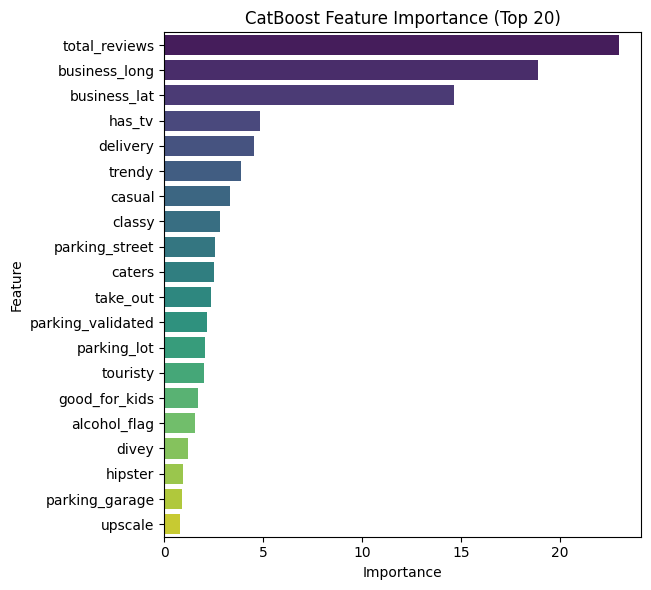

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get top 3 models based on highest F1 Score
top3_models = results_df.sort_values(by="F1 Score", ascending=False).head(3)["Model"].tolist()

feature_names = X.columns  # Get feature names from original dataset

fi_list = []  # List to store feature importance DataFrames for each model

plt.figure(figsize=(18, 6))  # Create a wide figure for 3 subplots side-by-side

for i, model_name in enumerate(top3_models):
    model = trained_models[model_name]  # Get the trained model object
    
    # Handle feature importance extraction based on model type
    if model_name == "LogisticRegression":
        # Logistic Regression coefficients can be negative, so sort by absolute values
        importance = pd.Series(model.coef_[0], index=feature_names)
    elif model_name in ["DecisionTree", "XGBoost", "CatBoost"]:
        # Tree-based models have feature_importances_ attribute
        importance = pd.Series(model.feature_importances_, index=feature_names)
    else:
        print(f"No feature importance available for {model_name}, skipping.")  
        continue  # Skip models without easily accessible feature importance
    
    # Sort features by descending absolute importance and select top 20
    importance = importance.reindex(importance.abs().sort_values(ascending=False).index)
    importance_top20 = importance.head(20)
    
    # Prepare a DataFrame for plotting
    fi_df = pd.DataFrame({
        "feature": importance_top20.index,
        "importance": importance_top20.values,
        "model": model_name
    })
    fi_list.append(fi_df)  # Save for combined analysis later
    
    # Plot the feature importance as a horizontal bar chart in subplot
    plt.subplot(1, 3, i + 1)
    sns.barplot(x="importance", y="feature", data=fi_df, palette="viridis")
    plt.title(f"{model_name} Feature Importance (Top 20)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Combine all top 20 feature importance DataFrames into one for further use or comparison
feature_importance_df = pd.concat(fi_list).reset_index(drop=True)


In [16]:
# Example: view top features per model
feature_importance_df.groupby("model").apply(lambda df: df.head(5))
# Now feature_importance_df can be used for any further analysis


/tmp/ipykernel_1396302/2828078253.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_importance_df.groupby("model").apply(lambda df: df.head(5))


feature  importance     model
model                                          
CatBoost 0  total_reviews   22.965734  CatBoost
         1  business_long   18.914363  CatBoost
         2   business_lat   14.669848  CatBoost
         3         has_tv    4.827282  CatBoost
         4       delivery    4.516668  CatBoost